<a href="https://colab.research.google.com/github/HoangTung99/CS114.L11.KHCL/blob/master/FinalReport/TrainModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bài toán: Nhận diện cảm xúc qua gương mặt người**

**1. Mô tả bài toán**

Input: Một bức ảnh kích thước 48x48, đã gray scale, có chứa đúng 1 gương mặt người thật, gương mặt người phải có cảm xúc là 1 trong 6 loại sau (angry, fear, happy, sad, neutral, surprise)

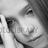

Ouput: Tên của 1 trong 6 loại cảm xúc (angry, fear, happy, sad, neutral, surprise)

Ví dụ: sad

**2. Mô tả bộ dữ liệu**

**Nguồn**: Coursera
**Cấu trúc thư mục dataset từ coursera:**
- Gồm 2 thư mục chính: train, test.
- Mỗi thư mục chính, sẽ bao gồm 6 thư mục con: angry, fear, happy, sad, neutral, surprise. Tên 6 thư mục này tương ứng với tên của 6 loại cảm xúc cần nhận dạng.
- Tổng số ảnh lên đến hơn 35 nghìn tấm.



Dataset lấy từ coursera sẽ được trích lọc lại thành thư mục dataset có tên DataSet_CS114


**Cấu trúc folder DataSet_CS114:**
- Gồm 3 thư mục chính: train, validation, test.
- Mỗi thư mục chính, sẽ bao gồm 6 thư mục con: angry, fear, happy, sad, neutral, surprise. Tên 6 thư mục này tương ứng với tên của 6 loại cảm xúc cần nhận dạng.
- Tổng số ảnh 10224.


**Phân chia dữ liệu:**
- Train (60%): 1024 tấm ảnh cho từng loại cảm xúc.
- Validation (20%): 340 tấm ảnh cho từng loại cảm xúc.
- Test (20%): 340 tấm ảnh cho từng loại cảm xúc.


**3. Mô tả về đặc trưng**

**4. Mô tả thuật toán máy học:**

Dùng model Sequential
Tác giả của mô hình cnn sử dụng trong bài toán này: Ian J. Goodfellow
Mô hình như sau:
- 4 khối Convolution ( mỗi khối gồm)
  + 1 convolution2D layer để trích xuất đặc trưng
  + 1 batchNormalization layer để chuẩn hoá khối batch
  + 1 relu layer để khử tuyến tính
  + 1 MaxPooling2D để giữ lại đặc trưng quan trọng => giảm độ phức tạp bài toán
  + 1 dropout layer để khử bớt dữ liệu => giảm over-fitting
- 1 Flattern layer 
- 2 khối fully connected
- 1 Dense Layer với activation function là softmax


**5. Cài đặt, tinh chỉnh tham số**

Tiến hành thay đổi các tham số (batch_size, số filter của 4 layer convolution2D, dataset size):

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow-gpu==2.0.rc

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
print(tf.__version__)

2.0.0-rc0


In [ ]:
path_dir_data = "drive/MyDrive/DataSet_CS114"
path_dir_data_train = path_dir_data + "train/"
path_dir_data_validation = path_dir_data + "validation/"
path_dir_data_test = path_dir_data + "test/"

In [ ]:
import os

In [ ]:
total_train = 0
for expression in os.listdir(path_dir_data_train):
    total_train_of_an_emotion = len(os.listdir(path_dir_data_train + expression))
    print(str(str(total_train_of_an_emotion) + " " + expression + " images"))
    total_train += total_train_of_an_emotion
print(total_train)

512 surprise images
512 happy images
512 fear images
512 sad images
512 angry images
512 neutral images
3072


In [ ]:
numberOfEmotions = 6
img_size = 48

In [ ]:
# Change params
batch_size = 16
epochs = 100

# filters of Conv2D
filter_1 = 16
filter_2 = 16
filter_3 = 32
filter_4 = 32

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
aug = ImageDataGenerator(zoom_range = 0.3,
                        rotation_range=20,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        horizontal_flip=True)

train_data = aug.flow_from_directory(path_dir_data_train,
                                     target_size=(img_size,img_size),
                                     batch_size=batch_size,
                                     shuffle=True)
valid_data = aug.flow_from_directory(path_dir_data_validation,target_size=(img_size,img_size),shuffle=True)

test_data = aug.flow_from_directory(path_dir_data_test,target_size=(img_size,img_size))

Found 3072 images belonging to 6 classes.
Found 1020 images belonging to 6 classes.
Found 1020 images belonging to 6 classes.


In [ ]:
# Source: Student Vo Tien Dung from Ho Chi Minh City University of Science
model = Sequential([# First Conv2D
                    Conv2D(filter_1,(3,3), padding='same',activation='relu',input_shape=(48,48,3)),
                    BatchNormalization(),
                    # Second Conv2D
                    Conv2D(filter_2,(3,3), padding='same',activation='relu'),
                    BatchNormalization(),
                    MaxPooling2D((2,2)),
                    # Third Conv2D
                    Conv2D(filter_3,(3,3),activation='relu',padding='same'),
                    BatchNormalization(),
                    # Fourth Conv2D
                    Conv2D(filter_4,(3,3),activation='relu',padding='same'),
                    BatchNormalization(),
                    MaxPooling2D((2,2)),
                    Flatten(),
                    Dense(512,activation='relu'),
                    BatchNormalization(),
                    Dense(numberOfEmotions,activation='softmax') ])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        1

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

In [ ]:
steps_per_epoch = total_train//batch_size

history = model.fit_generator(train_data,steps_per_epoch=steps_per_epoch,epochs=epochs,validation_data=valid_data)

Epoch 1/100
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
192/192 [==============================] - 986s 5s/step - loss: 2.2507 - accuracy: 0.2113 - val_loss: 2.0652 - val_accuracy: 0.1863
Epoch 2/100
192/192 [==============================] - 49s 253ms/step - loss: 1.8823 - accuracy: 0.2243 - val_loss: 2.4269 - val_accuracy: 0.1716
Epoch 3/100
192/192 [==============================] - 49s 254ms/step - loss: 1.8384 - accuracy: 0.2201 - val_loss: 1.8007 - val_accuracy: 0.2647
Epoch 4/100
192/192 [==============================] - 51s 267ms/step - loss: 1.8016 - accuracy: 0.2393 - val_loss: 2.0442 - val_accuracy: 0.2275
Epoch 5/100
192/192 [==============================] - 49s 257ms/step - loss: 1.7753 - accuracy: 0.2454 - val_loss: 1.8312 - val_accuracy: 0.2265
Epoch 6/100
192/192 [==============================] - 49s 257ms/step - loss: 1.7484 - accuracy: 0.2653 - val_loss: 1.8728 - val_accuracy: 0.2559
Epoch 7/100
192/192 [===========

In [ ]:
model_json = model.to_json()
with open(path_dir_data + "models_ver1/model_11/model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights(path_dir_data + "models_ver1/model_11/model_weights.h5")

In [ ]:
import matplotlib.pyplot as plt

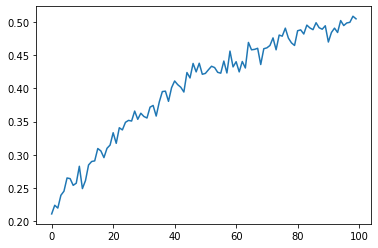

In [ ]:
plt.plot(history.history["accuracy"])
plt.show()